In [2]:
import serial,socket,os,glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time, threading,sys
colores = (plt.rcParams['axes.prop_cycle'].by_key()['color'])
from serial import Serial

## Calibración 

In [111]:
lista_ref = np.sort(glob.glob('referencia_*'))

medidas = np.zeros((9,2))
#medidas[:,1] = [0,1000,2000,200,3000,4000,400,5000,7000]
pesos = np.array([float(ai.split('_')[-1].split('g')[0]) for ai in lista_ref[1:-1:]])
indexp  = np.argsort(pesos)
medidas[1:,0] = pesos[indexp]

A = pd.read_csv('referencia_0000_a',names = ['Fzax[mV]'])

N = int((len(A)/5))
Fza_0 = np.zeros((N))
for i in range(N):
    Ai = A['Fzax[mV]'][i*5]
    Fza_0[i] = float(Ai.split('mV')[0])
#fig,ax = plt.subplots()
#ax.plot(Fza_0)
medidas [0,1] = Fza_0.mean()

A = pd.read_csv('referencia_0000_a',names = ['Fzax[mV]'])

N = int((len(A)/5))
Fza_0 = np.zeros((N))
for i in range(N):
    Ai = A['Fzax[mV]'][i*5]
    Fza_0[i] = float(Ai.split('mV')[0])
#fig,ax = plt.subplots()
#ax.plot(Fza_0)
medidas [0,1] = Fza_0.mean()


In [157]:
for j,filei in enumerate(lista_ref[1:-1][indexp]):
    A = pd.read_csv(filei,names = ['Fzax[mV]'])
    N = int((len(A)/7))
    Fza = np.zeros((N))
    for i in range(N):
        Ai = A['Fzax[mV]'][i*5]
        Fza[i] = float(Ai.split('mV')[0])
    medidas[1+j,1] = Fza.mean()

# Ajuste lineal
p1 = np.polyfit(medidas[:,1],medidas[:,0],1)
fit1 = np.poly1d(p1)

Text(-0.75, 5000, '$y$ [grf]$=-5592x+-71.3745$ ')

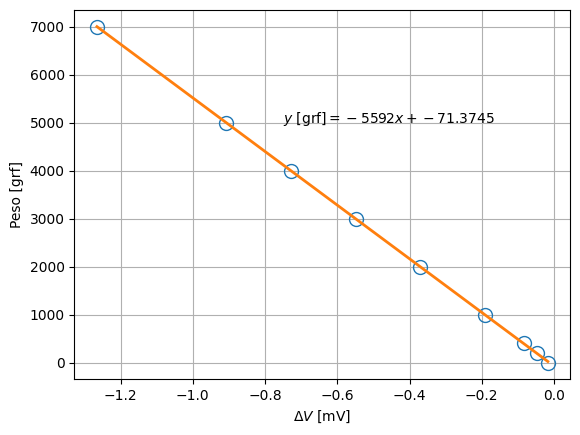

In [184]:
fig,ax = plt.subplots()
ax.plot(medidas[:,1],medidas[:,0],'o',markersize=10,fillstyle='none')
ax.plot([medidas[0,1],medidas[-1,1]],[fit1(medidas[0,1]),fit1(medidas[-1,1])],linewidth=2)
ax.grid()
ax.set_ylabel('Peso [grf]')
ax.set_xlabel('$\\Delta V$ [mV]');

ax.text(-0.75,5000,f'$y$ [grf]$={p1[0]:.4g}x+{p1[1]:.4f}$ ')